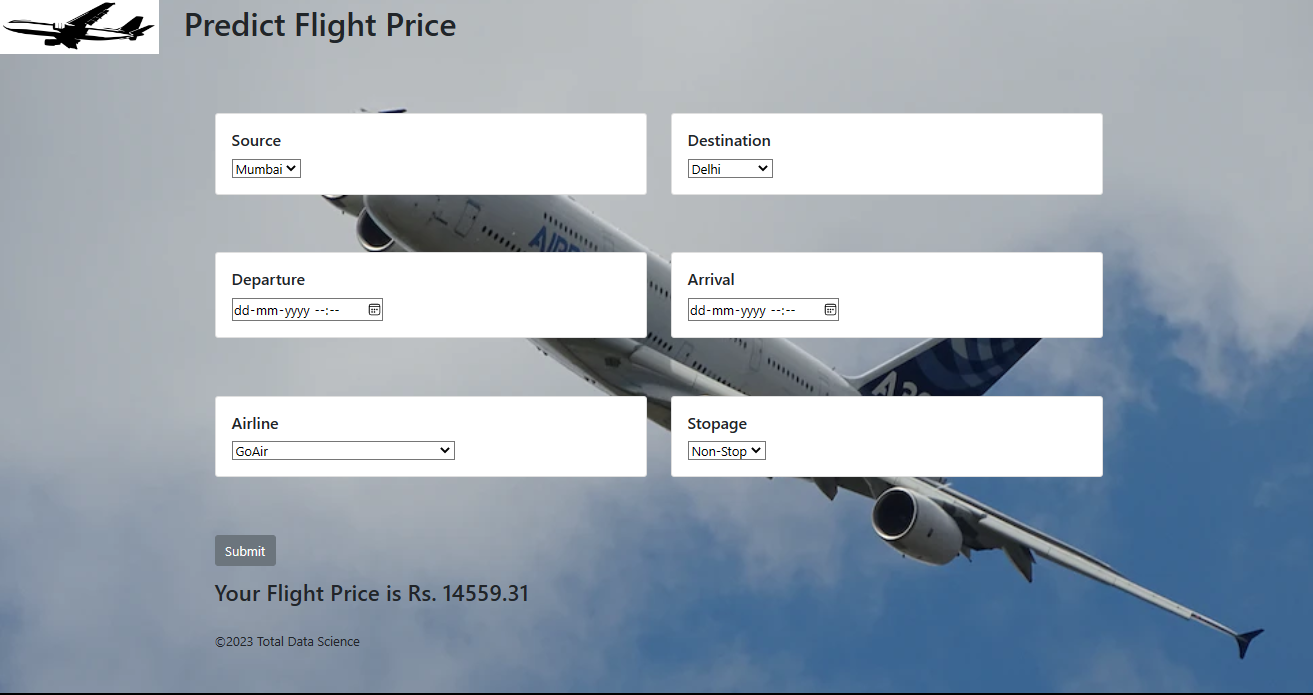

In [99]:
import PIL 
from PIL import Image
img=Image.open(r'flight_pred.png')
display(img)

In [2]:
!pip install chart_studio

In [3]:
!pip install cufflinks

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns

%matplotlib inline 

pd.pandas.set_option('display.max_columns',None)

In [5]:
#turn off the warnings
import warnings
warnings.filterwarnings('ignore')

# Train Data

In [6]:
df=pd.read_excel('Data_Train.xlsx')

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Automated EDA

In [8]:
!pip install -U pandas-profiling[notebook]

In [9]:
# pandas-profiling delivers an extended analysis of a DataFrame 
!pip install pandas-profiling


In [10]:
import pandas_profiling as pf

In [11]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Manual EDA

In [12]:
#checking no. of rows & columns
df.shape

(10683, 11)

In [13]:
#checking the data types
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
#checking null values
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [15]:
#remove the nan values
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering

Let's convert **Date_of_Journey** to its appropriate format as **datetime** with regards to **day** and **month**

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Date_of_journey

In [17]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [19]:
#we can now drop the Date_of_journey
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [20]:
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


### Dep_time

In [21]:
#convert to hour, min
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute


In [22]:
#drop Dep_Time column
df.drop(['Dep_Time'],axis=1,inplace=True)

In [23]:
df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25


### Arrival_time

In [24]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [25]:
#we can now drop the 'Arrival_Time'

df.drop(["Arrival_Time"],axis=1,inplace=True)

In [26]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25


### Duration Time

In [27]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based on space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')

In [28]:
#we can now drop the 'Duration'

df.drop(["Duration"],axis=1,inplace=True)

In [29]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00


In [30]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

### Count of Airlines

In [31]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Airline vs Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers Premium economy'),
  Text(3, 0, 'Multiple carriers'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara Premium economy'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'IndiGo'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'SpiceJet'),
  Text(11, 0, 'Trujet')])

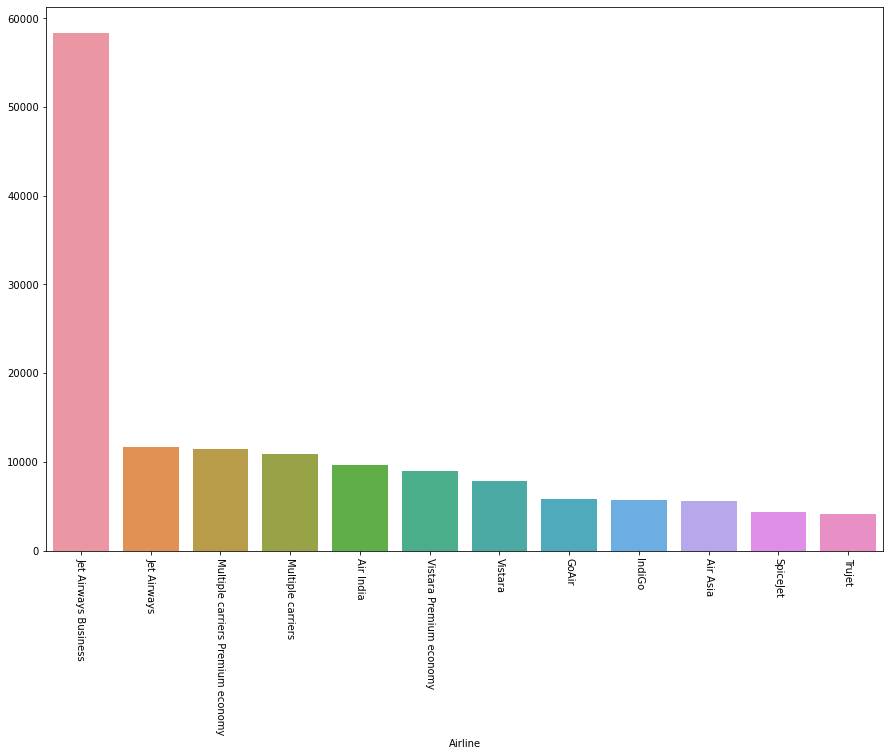

In [32]:
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)

Jet Airways Business has the highest price whereas Trujet having the lowest

In [33]:
Airprices

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9612.427756
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

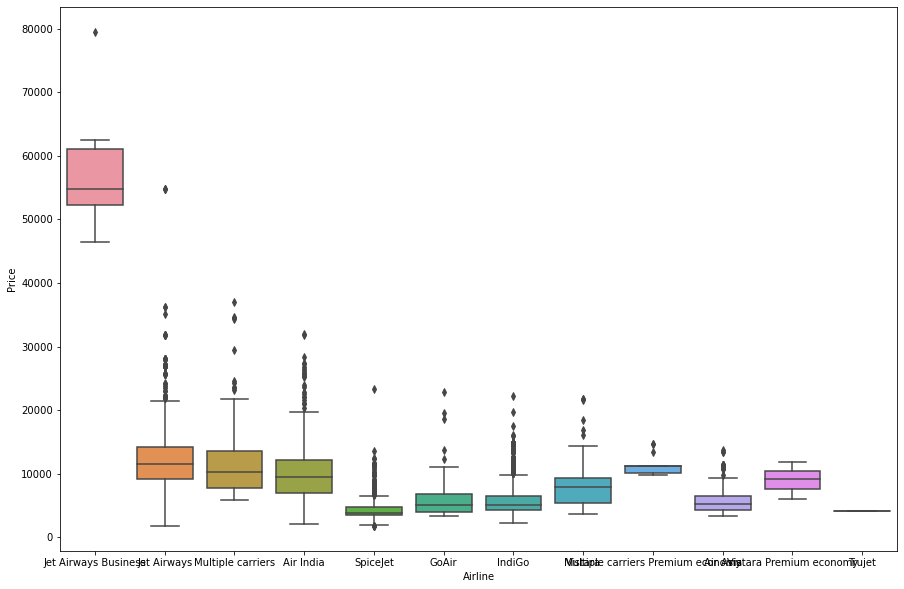

In [34]:
plt.figure(figsize=(15,10))
sns.boxplot(y="Price",x="Airline",data=df.sort_values('Price',ascending=False))
plt.show

### Price based on number of stops

In [35]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

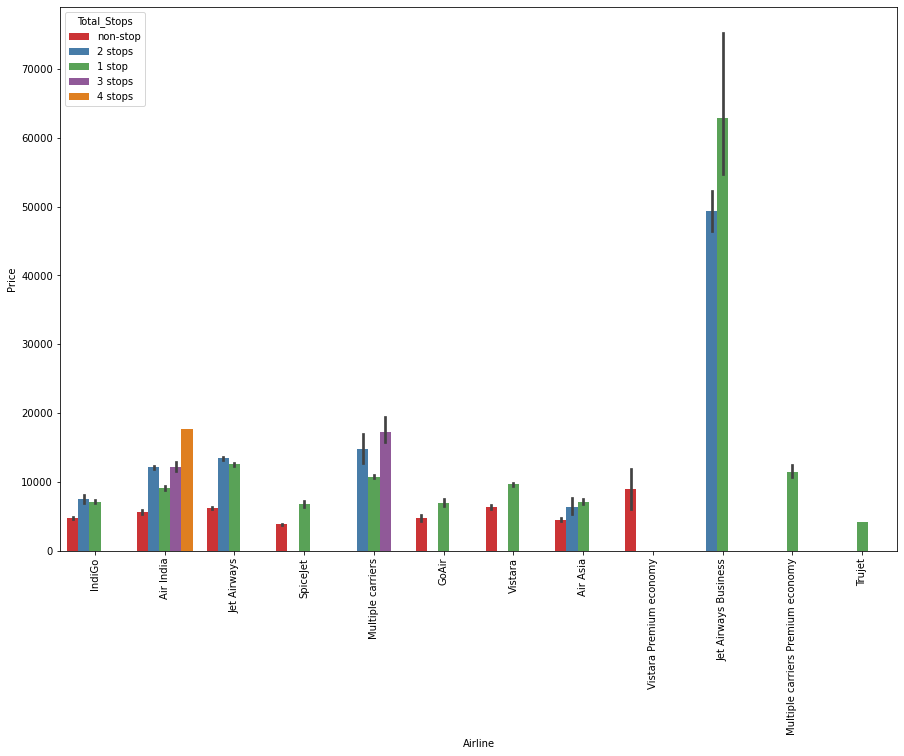

In [36]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

One stop and two stpos Jet Airways Business is having the highest price

In [37]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### Source vs Price

<function matplotlib.pyplot.show(close=None, block=None)>

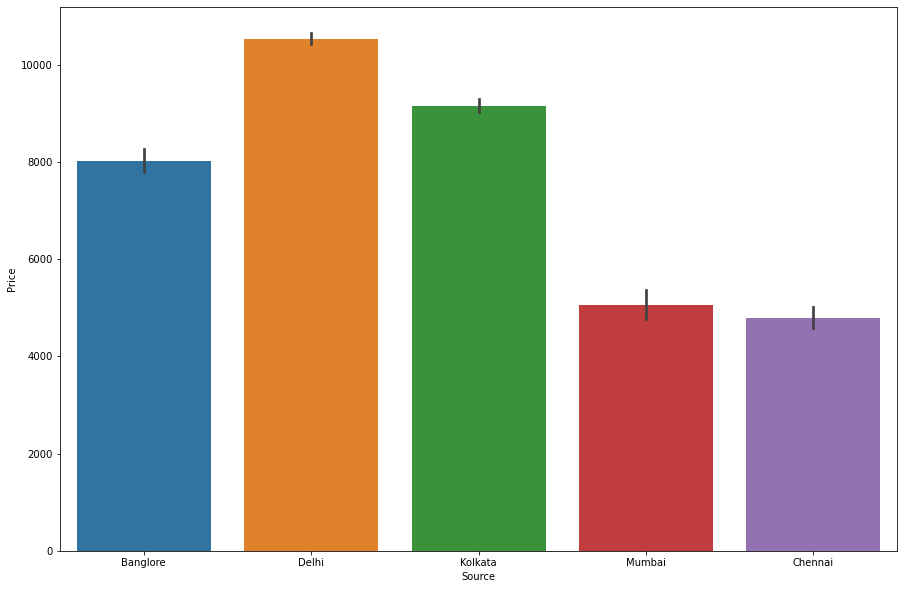

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(y="Price",x="Source",data=df.sort_values('Price',ascending=False))
plt.show

### Destination vs Price

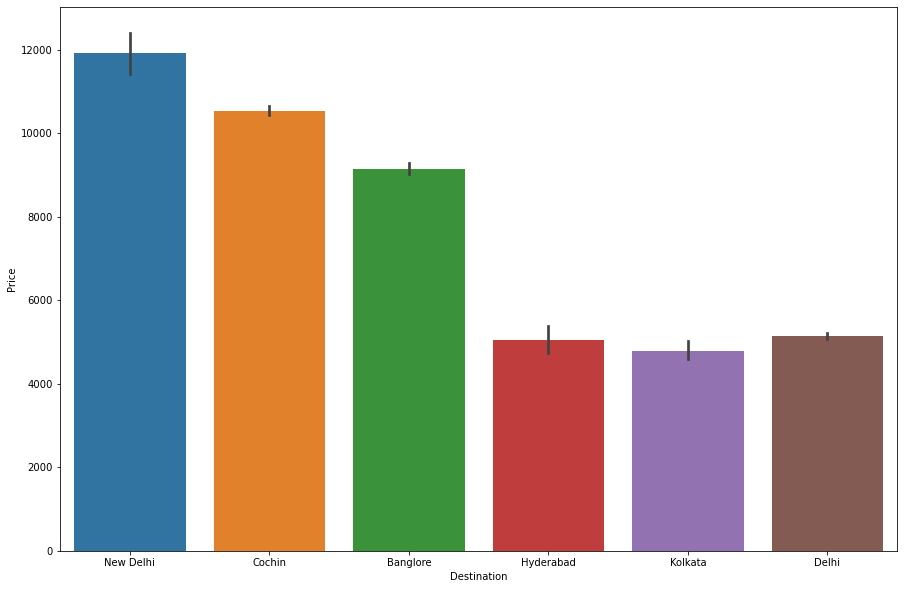

In [39]:
plt.figure(figsize=(15,10))
sns.barplot(y="Price",x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

In [40]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [41]:
#replacing New Delhi with Delhi
for i in df:
    df.replace('New Delhi',"Delhi",inplace=True)

In [42]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

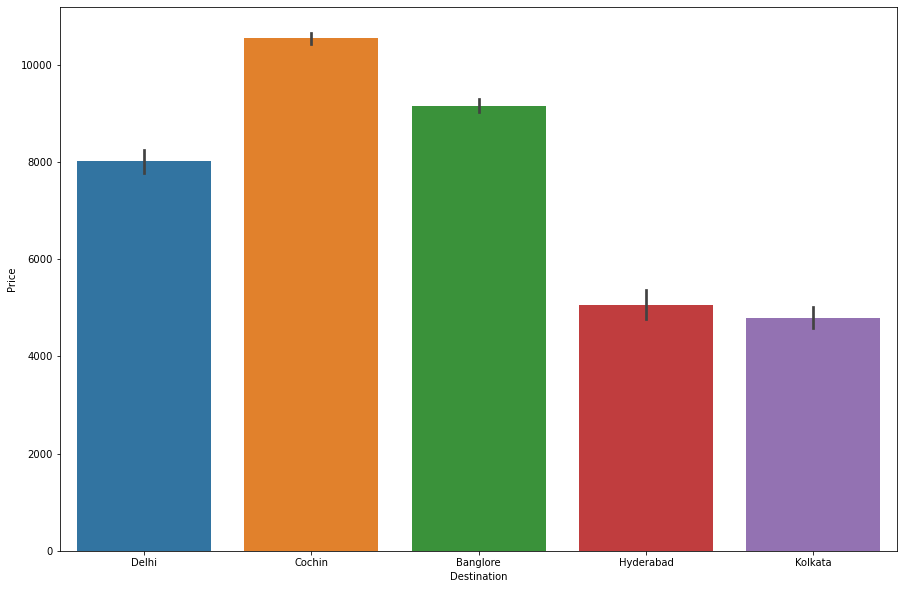

In [43]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

<AxesSubplot:>

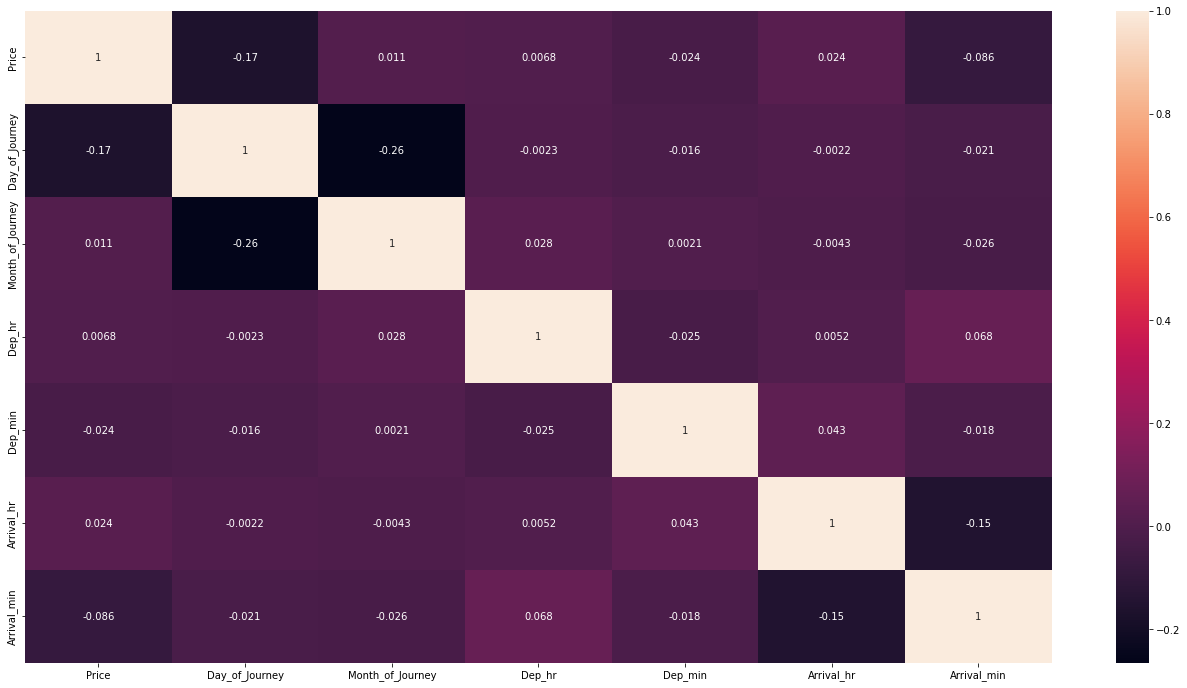

In [44]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True)

The features are less correlated which means there is no problem of **Multicollinearity**

### Apply Onehot Encoding on the categorical variables

In [45]:
#Handling Categorical Values 
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [46]:
#Creating dummy variables
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [47]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)


In [48]:
df.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00


In [49]:
df.shape

(10682, 31)

# Test Data

In [50]:
df_test=pd.read_excel("Test_set.xlsx")

In [51]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [53]:
df_test.shape

(2671, 10)

### Performing the same steps as we did for train data earlier

In [54]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)


In [55]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [56]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [57]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [58]:
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']

In [59]:
x.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00


# Model Building and Hyperparameter Tuning

#### Future Importance

<AxesSubplot:>

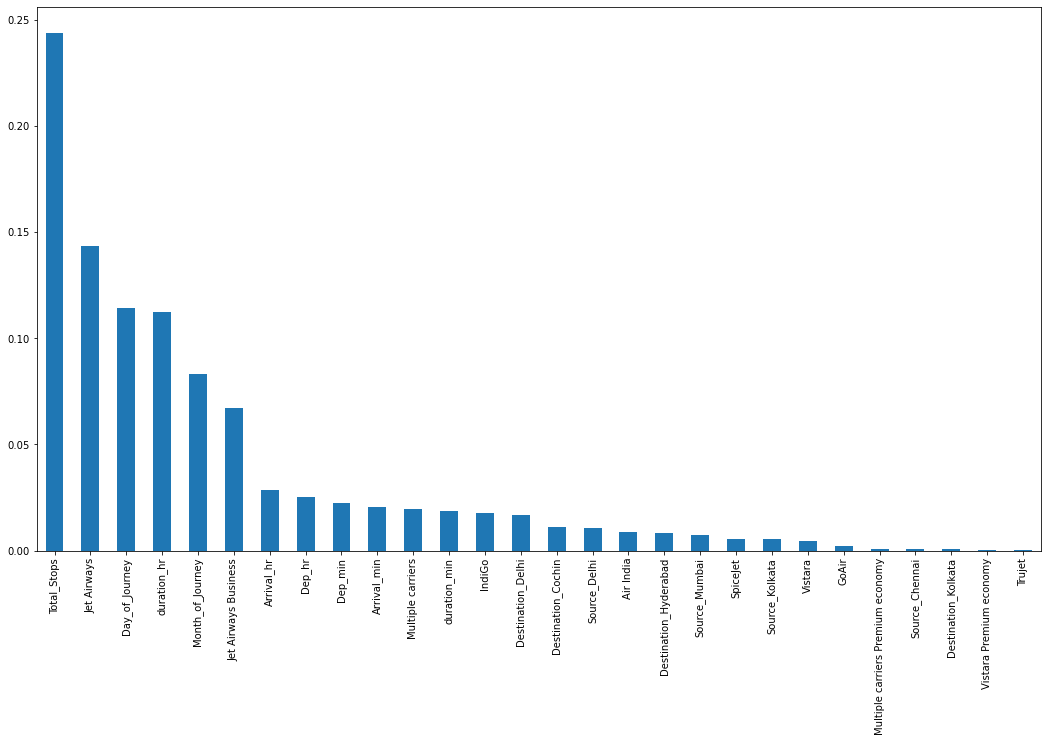

In [61]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

#### ExtraTreesRegressor

In [62]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [64]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7681565187569843

In [65]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7931349222565769

#### Hyperparameter Tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(start=80,stop=1500,num=10)]
max_features=['auto','sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

#create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()
rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42,n_jobs=1)


In [67]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [68]:
rf_pred=rCV.predict(X_test)
rf_pred

array([12515.58578788,  4285.65762582,  6133.1973802 , ...,
       11676.06242784,  9712.71592718,  8657.71379007])

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE', mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1157.152384809919
MSE 3967709.1255042204


In [70]:
r2_score(y_test,rf_pred)

0.8067706320352772

In [71]:
!pip install catboost

In [92]:
from catboost import CatBoostRegressor

Cat_Model=CatBoostRegressor()
Cat_Model.fit(X_train,y_train)

Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 4.13ms	remaining: 4.13s
1:	learn: 4317.7245126	total: 8.27ms	remaining: 4.13s
2:	learn: 4167.9871081	total: 12.8ms	remaining: 4.26s
3:	learn: 4030.4839609	total: 16.9ms	remaining: 4.21s
4:	learn: 3906.4844760	total: 20.4ms	remaining: 4.05s
5:	learn: 3785.4580402	total: 26.4ms	remaining: 4.38s
6:	learn: 3673.8662552	total: 30.2ms	remaining: 4.28s
7:	learn: 3582.0533069	total: 34ms	remaining: 4.22s
8:	learn: 3495.5629367	total: 37.8ms	remaining: 4.16s
9:	learn: 3404.7478335	total: 42.3ms	remaining: 4.19s
10:	learn: 3325.1004431	total: 46.4ms	remaining: 4.17s
11:	learn: 3254.1004651	total: 50.3ms	remaining: 4.14s
12:	learn: 3184.6084064	total: 55.3ms	remaining: 4.2s
13:	learn: 3122.3064005	total: 59.7ms	remaining: 4.21s
14:	learn: 3067.6550706	total: 64.7ms	remaining: 4.25s
15:	learn: 3014.5169632	total: 68.4ms	remaining: 4.21s
16:	learn: 2962.4252595	total: 72.7ms	remaining: 4.2s
17:	learn: 2920.1931240	total: 78.3ms	remaining: 

In [93]:
cat_pred=Cat_Model.predict(X_test)

In [78]:
r2_score(y_test,cat_pred)

0.8273858089678572

In [79]:
!pip install lightgbm

In [80]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [81]:
from lightgbm import LGBMRegressor
lgb_model=LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [83]:
lgb_pred=lgb_model.predict(X_test)
r2_score(y_test,lgb_pred)

0.8030064936005559

In [84]:
!pip install xgboost

In [85]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

0.8212496825906317

In [86]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


# Saving the Model

In [95]:
#Use pickle to save our model so that we can use it later

import pickle 

# Saving model to disk
pickle.dump(Cat_Model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [88]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [90]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)
deploy_df.to_csv('deploy_df')